# Zad.

* Wykona kenrlową estymację gęstości 2D.
* Dobierz odpowiednią szerokość okna.

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st
from sklearn import cluster, datasets

n_samples = 100
data, data_y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

In [3]:
x = data[:, 0]
y = data[:, 1]
print(x,y)
print(x.shape)
xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5, 1.5

[ 0.20930193  0.69717485 -0.31112386 -0.92711143  0.34804541 -0.50392716
  0.97568904  0.21923398  0.3001772  -0.96819905 -0.34189315  0.4340194
  0.69558589 -1.0164937  -0.50602832 -0.27937085 -0.82250214  0.34854904
  0.74717048  0.45299431  0.05622123 -0.92383456  1.01440399 -0.30765396
  0.51228884 -0.92117549  0.28288436 -0.93019806 -0.7618229   0.89533449
 -0.49168208 -0.52354178 -0.00174463  0.01595409  0.49149396  0.4951109
 -0.29125649 -0.40871741 -0.23840198 -0.09956671 -0.45896403 -0.2362847
  0.87464678 -0.44384933 -0.41728604 -0.91742089 -0.16359605  0.03119724
  0.1192104  -0.10471686  0.64499726 -0.75423316  0.94260797  0.58484645
  0.50764877 -0.38231077  0.1905027  -0.59579149 -0.53915586 -0.05418497
 -0.9906174  -0.3757981  -0.47088596  0.88178867 -0.93293451 -0.12800437
  0.86244735  0.18468604  0.33231826  0.22691793 -0.73288078  0.6198087
  0.05014571  0.50224013 -0.41089028  0.59666763 -0.4006581  -0.22179131
 -0.29402391  0.05515825  0.47152614 -0.35155471  0.183

In [4]:
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
print(xx, xx.shape)
print(yy, yy.shape)
positions = np.vstack([xx.ravel(), yy.ravel()])
print("positions=",positions)
values = np.vstack([x, y])
print("values=",values)

[[-1.5        -1.5        -1.5        ... -1.5        -1.5
  -1.5       ]
 [-1.46969697 -1.46969697 -1.46969697 ... -1.46969697 -1.46969697
  -1.46969697]
 [-1.43939394 -1.43939394 -1.43939394 ... -1.43939394 -1.43939394
  -1.43939394]
 ...
 [ 1.43939394  1.43939394  1.43939394 ...  1.43939394  1.43939394
   1.43939394]
 [ 1.46969697  1.46969697  1.46969697 ...  1.46969697  1.46969697
   1.46969697]
 [ 1.5         1.5         1.5        ...  1.5         1.5
   1.5       ]] (100, 100)
[[-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 ...
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]
 [-1.5        -1.46969697 -1.43939394 ...  1.43939394  1.46969697
   1.5       ]] (100, 100)
position

In [5]:
#calculate kernel density estimation
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

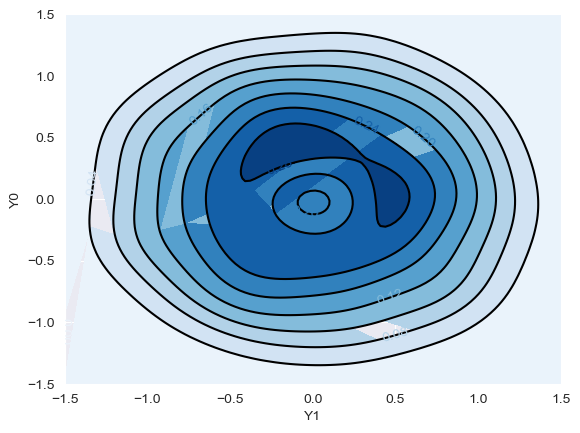

In [7]:
fig = pl.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# Label plot
ax.clabel(cfset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')

pl.show()